#COVID-19

###Importing the required libraries

In [0]:
# importing the required libraries
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

# Part 1: Analysing the present condition in India


## 1.1 Reading the Datasets


In [0]:
#Learn how to read a .xls file by creating a dataframe using pandas
# Reading the datasets
df= pd.read_excel('Covid cases in India.xlsx')
df_india = df.copy()
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1
5,6,Haryana,14,14,11,0
6,7,Himachal Pradesh,3,0,0,1
7,8,Karnataka,41,0,3,1
8,9,Kerala,101,8,4,0
9,10,Madhya Pradesh,9,0,0,0


In [0]:
# Coordinates of India States and Union Territories with thier city longitude an altitude
India_coord = pd.read_excel('in.xlsx')

#Day by day data of India, Korea, Italy and Wuhan
dbd_India = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name='India')
dbd_Italy = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name='Italy')
dbd_Korea = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name="Korea")
dbd_Wuhan = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name="Wuhan")
dbd_India["Days after surpassing 100 cases"]=dbd_India["Days after surpassing 100 cases"].fillna(0)
dbd_Italy

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-31,2,2,0
1,2020-02-01,2,0,0
2,2020-02-02,2,0,0
3,2020-02-03,2,0,0
4,2020-02-04,2,0,0
5,2020-02-05,2,0,0
6,2020-02-06,3,1,0
7,2020-02-07,3,0,0
8,2020-02-08,3,0,0
9,2020-02-09,3,0,0


## 1.2 Analysing COVID19 Cases in India

In [0]:
#Learn how to play around with the dataframe and create a new attribute of 'Total Case'
#Total case is the total number of confirmed cases (Indian National + Foreign National)

df.drop(['S. No.'],axis=1,inplace=True)
df['Total cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']
total_cases = df['Total cases'].sum()
print('Total number of confirmed COVID 2019 cases across India till date (22nd March, 2020):', total_cases)


Total number of confirmed COVID 2019 cases across India till date (22nd March, 2020): 562


In [0]:
#Learn how to highlight your dataframe
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases
0,Andhra Pradesh,9,0,0,0,9
1,Bihar,3,0,0,1,3
2,Chhattisgarh,1,0,0,0,1
3,Delhi,30,1,6,1,31
4,Gujarat,32,1,0,1,33
5,Haryana,14,14,11,0,28
6,Himachal Pradesh,3,0,0,1,3
7,Karnataka,41,0,3,1,41
8,Kerala,101,8,4,0,109
9,Madhya Pradesh,9,0,0,0,9


**Visualization Inference:** 
* Manipur and Mizoram reports thier first case. 
* Kerela has crossed Maharashtra in terms of highest number of confirmed cases.
* Haryana and Telengana has the highest count of confirmed Foreign National count.
* Till 25th of March 9 people have died in India
* Kerala, Maharashtra, and karnataka are currently TOP 3 states with maximum number of confirmed cases

## 1.3 Number of Active COVID-19 cases in affected State/Union Territories   

In [0]:
#Total Active  is the Total cases - (Number of death + Cured)
# df['Total Active'] = df['Total cases'] - (df['Death'] + df['Cured'])
# total_active = df['Total Active'].sum()
# print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('Name of State / UT')['Total cases'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

,Total cases
Name of State / UT,
Kerala,109
Maharashtra,101
Karnataka,41
Uttar Pradesh,35
Telengana,35
Gujarat,33
Rajasthan,32
Delhi,31
Punjab,29


## 1.4 Visualising the spread geographically

In [0]:
#  folium to create a zoomable map
df_full = pd.merge(India_coord,df,on='Name of State / UT')
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['lat'],df_full['lng'], df_full['Total cases'], df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon], radius=value*0.8, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

## 1.5 Confirmed vs Recovered figures

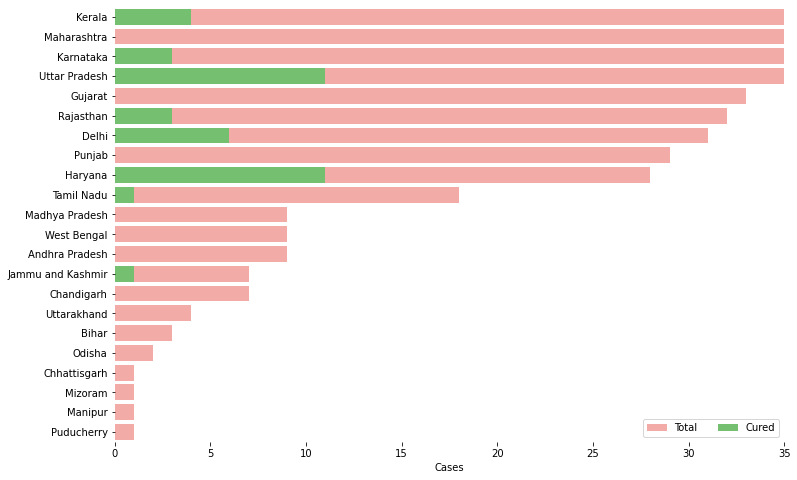

In [0]:
# Seaborn for visualization
f, ax = plt.subplots(figsize=(12, 8))
data = df_full[['Name of State / UT','Total cases','Cured','Death']]
data.sort_values('Total cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total cases", y="Name of State / UT", data=data,label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured", color="g")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 35), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

## 1.6 How the Coronavirus cases are rising?

In [0]:
#This cell's code is required when you are working with plotly on colab
import plotly
plotly.io.renderers.default = 'colab'

In [0]:
# interactive graphs using plotly
# import plotly.graph_objects as go
# Rise of COVID-19 cases in India
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['Date'], y = dbd_India['Total Cases'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(142, 201, 0)')
fig.show()

# New COVID-19 cases reported daily in India

import plotly.express as px
fig = px.bar(dbd_India, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(142, 201, 0)')

fig.show()

# Part 2: Is the trend similar to Italy?


India has already crossed 562 cases. It is very important to contain the situation in the coming 21 days.The numbers of coronavirus patients starting doubling after these countries hit the 100 mark and almost starting increasing exponentially.

## 2.1 Cumulative cases in India, Italy and other

In [0]:
fig = px.bar(dbd_India, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)

'''Colour Scale for plotly
https://plot.ly/python/builtin-colorscales/
'''

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Italy, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Italy', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Korea, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in South Korea', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()
fig = px.bar(dbd_Wuhan, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Wuhan', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()


## 2.2 Comparison between the rise of cases in  Italy and India

In [0]:
#Learn how to create subplots using plotly
# import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("S.Korea","Italy", "India","Wuhan"))

fig.add_trace(go.Bar(x=dbd_Korea['Date'], y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'], coloraxis="coloraxis")),1, 1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'], coloraxis="coloraxis")),1, 2)

fig.add_trace(go.Bar(x=dbd_India['Date'], y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'], coloraxis="coloraxis")),2, 1)

# fig.add_trace(go.Bar(x=dbd_Wuhan['Date'], y=dbd_Wuhan['Total Cases'],
#                     marker=dict(color=dbd_Wuhan['Total Cases'], coloraxis="coloraxis")),2, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

## 2.3 Trend after crossing 100 cases

In [0]:
# import plotly.graph_objects as go

title = 'Main Source for News'
labels = ['S.Korea', 'Italy', 'India']
colors = ['rgb(122,128,0)', 'rgb(255,0,0)', 'rgb(49,130,189)']

mode_size = [10, 10, 12]
line_size = [1, 1, 8]

fig = go.Figure()


fig.add_trace(go.Scatter(x=dbd_Korea['Days after surpassing 100 cases'], 
                 y=dbd_Korea['Total Cases'],mode='lines',
                 name=labels[0],
                 line=dict(color=colors[0], width=line_size[0]),            
                 connectgaps=True))
fig.add_trace(go.Scatter(x=dbd_Italy['Days after surpassing 100 cases'], 
                 y=dbd_Italy['Total Cases'],mode='lines',
                 name=labels[1],
                 line=dict(color=colors[1], width=line_size[1]),            
                 connectgaps=True))

fig.add_trace(go.Scatter(x=dbd_India['Days after surpassing 100 cases'], 
                 y=dbd_India['Total Cases'],mode='lines',
                 name=labels[2],
                 line=dict(color=colors[2], width=line_size[2]),            
                 connectgaps=True))
    
    
    
annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Days after crossing 100 cases ',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations,plot_bgcolor='white',yaxis_title='Cumulative cases')

fig.show()


**Visualization Inference:** 

* Above graph depicts the number of days after the COVID-19 cases crosses 100 vs total number of cases in each country. 
* Both Italy and S.Korea have crossed the mark of 5600 in the next 13 days.
* Number of cases detected(trend) in India is less as compared to Italy and S.Korea

#Part 3:  Exploring World wide data


In [0]:
df = pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

df_confirmed = pd.read_csv("time_series_covid19_confirmed_global.csv")
df_recovered = pd.read_csv("time_series_covid19_recovered_global.csv")
df_deaths = pd.read_csv("time_series_covid19_deaths_global.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [0]:
df_deaths.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2


In [0]:
df.tail()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
20092,Falkland Islands (Malvinas),United Kingdom,-51.79630,-59.523600,2020-04-07,2,0,0
20093,Saint Pierre and Miquelon,France,46.88520,-56.315900,2020-04-07,1,0,0
20094,NaN,South Sudan,6.87700,31.307000,2020-04-07,2,0,0
20095,NaN,Western Sahara,24.21550,-12.885800,2020-04-07,4,0,0
20096,NaN,Sao Tome and Principe,0.18636,6.613081,2020-04-07,4,0,0


In [0]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.head()

,Date,Country,Province/State,Confirmed,Deaths,Recovered
0,2020-01-22,Australia,Australian Capital Territory,0,0,0
1,2020-01-22,Australia,New South Wales,0,0,0
2,2020-01-22,Australia,Northern Territory,0,0,0
3,2020-01-22,Australia,Queensland,0,0,0
4,2020-01-22,Australia,South Australia,0,0,0


In [0]:
# Check for India's data
df.query('Country=="India"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,0,0,0
1,2020-01-23,0,0,0
2,2020-01-24,0,0,0
3,2020-01-25,0,0,0
4,2020-01-26,0,0,0
...,...,...,...,...
72,2020-04-03,2567,72,192
73,2020-04-04,3082,86,229
74,2020-04-05,3588,99,229
75,2020-04-06,4778,136,375


In [0]:
#Overall worldwide Confirmed/ Deaths/ Recovered cases 
df.groupby('Date').sum().tail()

,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,
2020-04-03,5600.04289,5872.157373,1095915,58787,223621
2020-04-04,5600.04289,5872.157373,1197403,64606,243572
2020-04-05,5600.04289,5872.157373,1272113,69374,256997
2020-04-06,5600.04289,5872.157373,1345099,74565,273256
2020-04-07,5600.04289,5872.157373,1426094,81865,296259


## 3.1 Visualizing: Worldwide NCOVID-19 cases  

In [0]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
72,2020-04-03,1095915
73,2020-04-04,1197403
74,2020-04-05,1272113
75,2020-04-06,1345099


In [0]:
fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'),plot_bgcolor='rgb(142, 201, 0)')

fig.show()

#Part 4: Forecasting Total Number of Cases Worldwide



## Prophet
Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

We use Prophet, a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well. 

## Why Prophet?

* **Accurate and fast:**  Prophet is used in many applications across Facebook for producing reliable forecasts for planning and goal setting. Facebook finds it to perform better than any other approach in the majority of cases. It fit models in [Stan](https://mc-stan.org/) so that you get forecasts in just a few seconds.

* **Fully automatic:** Get a reasonable forecast on messy data with no manual effort. Prophet is robust to outliers, missing data, and dramatic changes in your time series.

* **Tunable forecasts:** The Prophet procedure includes many possibilities for users to tweak and adjust forecasts. You can use human-interpretable parameters to improve your forecast by adding your domain knowledge

* **Available in R or Python:** Facebook has implemented the Prophet procedure in R and Python. Both of them share the same underlying Stan code for fitting. You can use whatever language you’re comfortable with to get forecasts. 


## References 
- https://facebook.github.io/prophet/
- https://facebook.github.io/prophet/docs/
- https://github.com/facebook/prophet
- https://facebook.github.io/prophet/docs/quick_start.html

In [0]:
from fbprophet import Prophet

In [0]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

The input to Prophet is always a dataframe with two columns: **ds** and **y**. The **ds (datestamp)** column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [0]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
confirmed

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
72,2020-04-03,1095915
73,2020-04-04,1197403
74,2020-04-05,1272113
75,2020-04-06,1345099


In [0]:

confirmed.tail()

,ds,y
72,2020-04-03,1095915
73,2020-04-04,1197403
74,2020-04-05,1272113
75,2020-04-06,1345099
76,2020-04-07,1426094



##4.1 Forecasting Confirmed NCOVID-19 Cases Worldwide with Prophet (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [0]:
m = Prophet(interval_width=1)
m.fit(confirmed)
future = m.make_future_dataframe(periods=5)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
77,2020-04-08
78,2020-04-09
79,2020-04-10
80,2020-04-11
81,2020-04-12


The **predict** method will assign each row in future a predicted value which it names **yhat**. If you pass in historical dates, it will provide an in-sample fit. The **forecast object** here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [0]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-1.220684e+04,-6.277135e+04,4.319761e+04
1,2020-01-23,-8.094289e+03,-6.100503e+04,4.116908e+04
2,2020-01-24,-2.685592e+03,-6.488638e+04,5.521506e+04
3,2020-01-25,4.222092e+03,-4.262451e+04,6.046317e+04
4,2020-01-26,8.227192e+03,-3.904416e+04,5.966726e+04
...,...,...,...,...
77,2020-04-08,1.434065e+06,1.386494e+06,1.483519e+06
78,2020-04-09,1.503461e+06,1.451335e+06,1.555891e+06
79,2020-04-10,1.574154e+06,1.513951e+06,1.642616e+06
80,2020-04-11,1.646345e+06,1.574837e+06,1.714366e+06


You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.

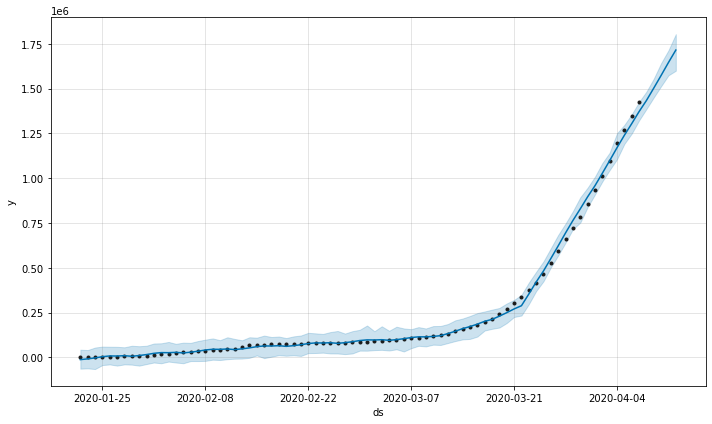

In [0]:
confirmed_forecast_plot = m.plot(forecast)

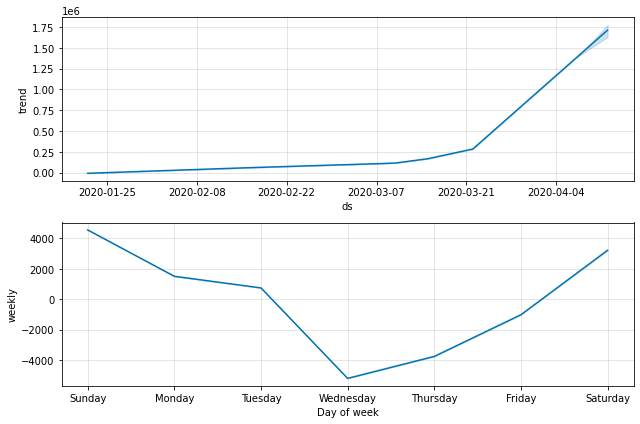

In [0]:
confirmed_forecast_plot =m.plot_components(forecast)

##4.2 Forecasting Worldwide Deaths using Prophet (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [0]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [0]:
m = Prophet(interval_width=1)
m.fit(deaths)
future = m.make_future_dataframe(periods=5)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
77,2020-04-08
78,2020-04-09
79,2020-04-10
80,2020-04-11
81,2020-04-12


In [0]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
77,2020-04-08,77752.260128,71841.207733,83225.081349
78,2020-04-09,81854.291721,76208.219441,88126.087451
79,2020-04-10,85991.430067,80069.299626,91357.675857
80,2020-04-11,90166.643859,83328.795441,96046.356193
81,2020-04-12,94245.680514,86126.727400,101678.380142


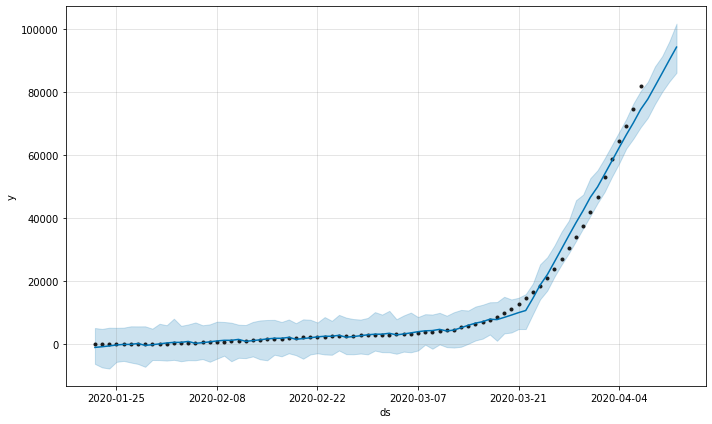

In [0]:
deaths_forecast_plot = m.plot(forecast)

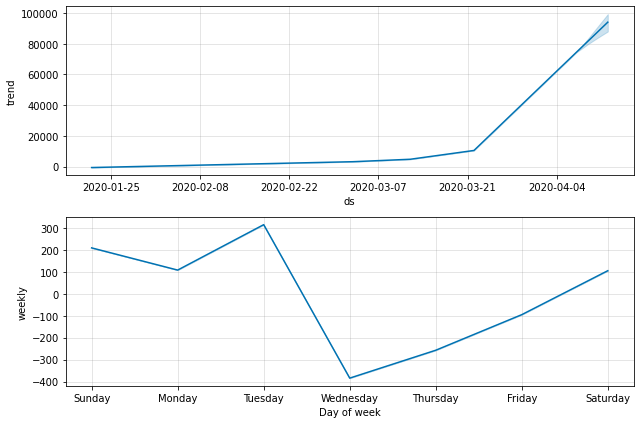

In [0]:
deaths_forecast_plot = m.plot_components(forecast)

##4.3 Forecasting Worldwide Recovered Cases with Prophet (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [0]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [0]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=5)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
77,2020-04-08
78,2020-04-09
79,2020-04-10
80,2020-04-11
81,2020-04-12


In [0]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
77,2020-04-08,278301.238705,265603.412071,289729.465584
78,2020-04-09,289660.445502,276446.830097,302125.754660
79,2020-04-10,300985.174082,287828.004192,313067.043781
80,2020-04-11,313192.035909,300538.280804,326058.726600
81,2020-04-12,324726.256236,311551.632514,337679.123825


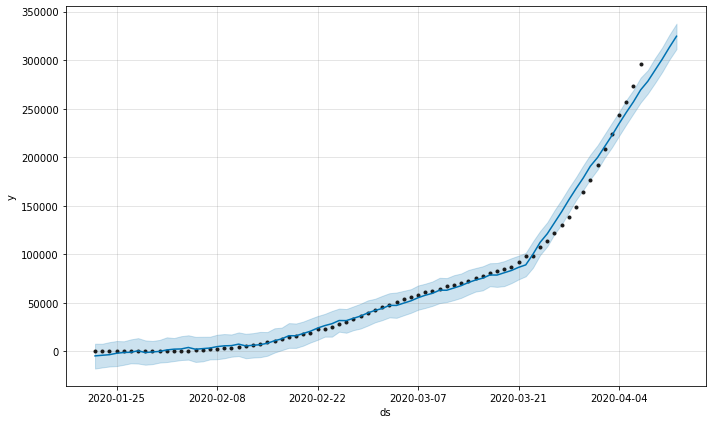

In [0]:
recovered_forecast_plot = m.plot(forecast)

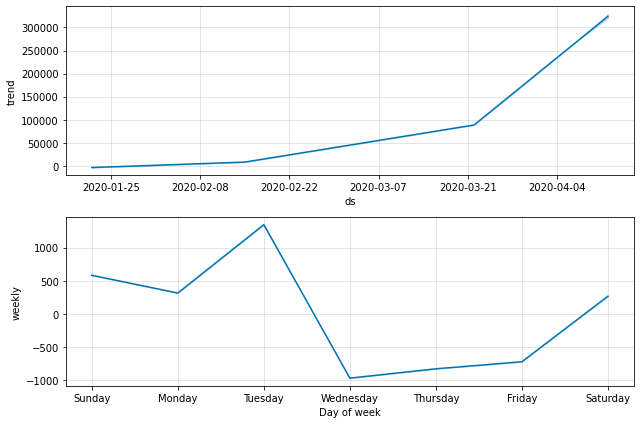

In [0]:
recovered_forecast_plot = m.plot_components(forecast)
